## Part 1 - Netflix Dataset

In [ ]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("netflix_titles.csv")

# 2. Display the first 5 and last 5 rows
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

# 3. Shape of the dataset
print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")

# 4. Number of unique countries
print("\nNumber of unique countries where content is produced:")
print(df['country'].nunique())

# 5. All records where type is 'TV Show'
tv_shows = df[df['type'] == 'TV Show']
print("\nTV Show Records:")
print(tv_shows)

# 6. Convert 'date_added' to datetime and extract year and month
df['date_added'] = df['date_added'].str.strip()  
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') 

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print("\nDate Added (with Year & Month):")
print(df[['date_added', 'year_added', 'month_added']].head())

# 7. Movies released in 2019
movies_2019 = df[(df['type'] == 'Movie') & (df['release_year'] == 2019)]
print("\nNumber of movies released in 2019:", len(movies_2019))

# 8. Group by rating and count
print("\nRating Counts:")
print(df['rating'].value_counts())


First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24

## Part 2 - World Population Dataset

In [4]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv("world_population.csv")

# 2. Top 10 rows
print("Top 10 rows:")
print(df.head(10))

# 3. Check null values
print("\nNull values in each column:")
print(df.isnull().sum())
df.fillna(0, inplace=True)

# 4. Top 5 most populous countries (based on 2022 Population)
df['2022 Population'] = pd.to_numeric(df['2022 Population'], errors='coerce')
top_5 = df.sort_values(by='2022 Population', ascending=False).head(5)
print("\nTop 5 most populous countries (2022):")
print(top_5[['Country/Territory', '2022 Population']])

# 5. GDP per capita (assuming 'GDP' column exists; if not, skip this block)
if 'GDP' in df.columns:
    df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')
    df['GDP_per_capita'] = df['GDP'] / df['2022 Population']
    print("\nGDP per Capita:")
    print(df[['Country/Territory', 'GDP_per_capita']].head())
else:
    print("\nGDP column not found in dataset. Skipping GDP per capita calculation.")

# 6. Filter countries: population > 100M and area < 500,000 km²
if 'Area (km²)' in df.columns:
    df['Area (km²)'] = pd.to_numeric(df['Area (km²)'], errors='coerce')
    filtered = df[(df['2022 Population'] > 1e8) & (df['Area (km²)'] < 500000)]
    print("\nCountries with population > 100M and area < 500,000 km²:")
    print(filtered[['Country/Territory', '2022 Population', 'Area (km²)']])
else:
    print("\nArea column not found in dataset.")

# 7. Sort by density descending
df['Density (per km²)'] = pd.to_numeric(df['Density (per km²)'], errors='coerce')
sorted_density = df.sort_values(by='Density (per km²)', ascending=False)
print("\nTop 5 most densely populated countries:")
print(sorted_density[['Country/Territory', 'Density (per km²)']].head())


Top 10 rows:
   Rank CCA3    Country/Territory           Capital      Continent  \
0    36  AFG          Afghanistan             Kabul           Asia   
1   138  ALB              Albania            Tirana         Europe   
2    34  DZA              Algeria           Algiers         Africa   
3   213  ASM       American Samoa         Pago Pago        Oceania   
4   203  AND              Andorra  Andorra la Vella         Europe   
5    42  AGO               Angola            Luanda         Africa   
6   224  AIA             Anguilla        The Valley  North America   
7   201  ATG  Antigua and Barbuda      Saint John’s  North America   
8    33  ARG            Argentina      Buenos Aires  South America   
9   140  ARM              Armenia           Yerevan           Asia   

   2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771         38972230         33753499         28189672   
1          2842321          2866849          2882481          2913399 

## Part 3 - IPL Dataset

In [6]:
import pandas as pd

# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Show columns to verify merge keys
print("Matches columns:\n", matches.columns)
print("Deliveries columns:\n", deliveries.columns)

# 1. Most successful team
print("\nMost Successful Team:")
print(matches['winner'].value_counts().head(1))

# 2. Matches per season
print("\nMatches per Season:")
print(matches['season'].value_counts().sort_index())

# 3. Top 5 "Player of the Match"
print("\nTop 5 Player of the Match:")
print(matches['player_of_match'].value_counts().head(5))

# 4. Merge matches & deliveries
combined = pd.merge(deliveries, matches, left_on='match_id', right_on='id')
print("\nMerged DataFrame Head:")
print(combined.head())


Matches columns:
 Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
Deliveries columns:
 Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

Most Successful Team:
winner
Mumbai Indians    144
Name: count, dtype: int64

Matches per Season:
season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64

Top 5 Player of the Matc

## Part 4 - Students Performance

Math: 66.089
Reading: 69.169
Writing: 68.054
gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64
   total  percentage
0    218   72.666667
1    247   82.333333
2    278   92.666667
3    148   49.333333
4    229   76.333333


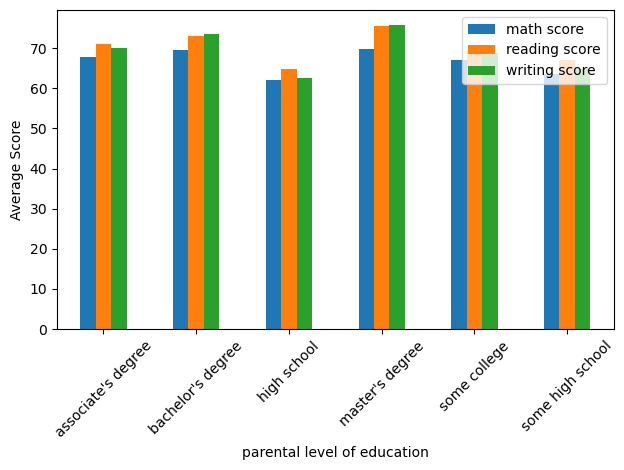

     gender race/ethnicity parental level of education         lunch  \
114  female        group E           bachelor's degree      standard   
149    male        group E          associate's degree  free/reduced   
165  female        group C           bachelor's degree      standard   
179  female        group D            some high school      standard   
451  female        group E                some college      standard   
458  female        group E           bachelor's degree      standard   
546  female        group A            some high school      standard   
566  female        group E           bachelor's degree  free/reduced   
571    male        group A           bachelor's degree      standard   
594  female        group C           bachelor's degree      standard   
625    male        group D                some college      standard   
685  female        group E             master's degree      standard   
712  female        group D                some college      stan

In [7]:

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

# 1. Average marks
print("Math:", df['math score'].mean())
print("Reading:", df['reading score'].mean())
print("Writing:", df['writing score'].mean())

# 2. Who performed better in writing?
print(df.groupby('gender')['writing score'].mean())

# 3. Total score & percentage
df['total'] = df['math score'] + df['reading score'] + df['writing score']
df['percentage'] = df['total'] / 3
print(df[['total', 'percentage']].head())

# 4. Bar chart by parental level of education
import matplotlib.pyplot as plt
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Students scoring above 90% in all subjects
top_students = df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)]
print(top_students)


## Part 5 - Flight Price Dataset

In [11]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv("Clean_Dataset.csv")

# 2. Basic info
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

# 3. Most frequent airline and source city
print("\nMost Frequent Airline:")
print(df['airline'].value_counts().head(1))

print("\nMost Frequent Source City:")
print(df['source_city'].value_counts().head(1))

# 4. Remove duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

# 5. Optional: Check class distribution
print("\nTravel Class Distribution:")
print(df['class'].value_counts())

# 6. Optional: Price range check
print("\nPrice Range:")
print("Min:", df['price'].min(), "Max:", df['price'].max())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None

Dataset Description:
          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.00

C:\Users\SAPTAK MONDAL\AppData\Local\Temp\ipykernel_24520\1576323315.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
